Installazione ed import delle dipendenze

In [13]:
!pip install opencv-python mediapipe

In [14]:
import cv2
import mediapipe as mp

Setup di mediapipe

In [66]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [67]:
mp_drawing = mp.solutions.drawing_utils
mp_objectron = mp.solutions.objectron

Caricare un'immagine 2D di una tazza dal drive






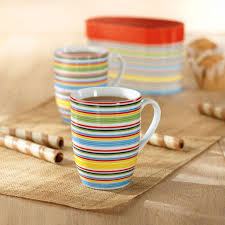

-1

In [68]:
from google.colab.patches import cv2_imshow

image = cv2.imread("/content/drive/Shareddrives/VisioneEPercezione/tazza6.jpg")
cv2_imshow(image)
cv2.waitKey(0)

Immagine1: "/content/drive/Shareddrives/VisioneEPercezione/TazzaEx.jpg"

Immagine2: "/content/drive/Shareddrives/VisioneEPercezione/tazza.jpg"

Detection e tracciamento

In [74]:
with mp_objectron.Objectron(static_image_mode=True,
                            max_num_objects=2,
                            min_detection_confidence=0.5,
                            model_name='Cup') as objectron:
  
    image = cv2.imread("/content/drive/Shareddrives/VisioneEPercezione/tazza6.jpg")
    # Conversione dell'immagine BGR a RGB e processamento con MediaPipe Objectron.
    results = objectron.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    # Disegnare landmarks della box.
    annotated_image = image.copy()
    for detected_object in results.detected_objects:
      mp_drawing.draw_landmarks(
          annotated_image, detected_object.landmarks_2d, mp_objectron.BOX_CONNECTIONS)
      mp_drawing.draw_axis(annotated_image, detected_object.rotation,
                           detected_object.translation)
      cv2.imwrite('/tmp/annotated_image' + '.png', annotated_image)

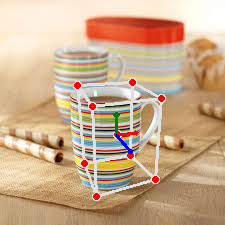

In [75]:
cv2_imshow(annotated_image)